# Combined Dataset - Feed Forward Neural Network
## Essentia Best Arousal + openSMILE GeMAPS Featureset

## Import relevant libraries

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torcheval.metrics import R2Score

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import math

import sys

## Neural Network Training

### Import annotations dataset

In [2]:
df_annotations = pd.read_csv('../../data/combined/annotations/combined_static_annotations.csv')
df_annotations

song_id  valence_mean_mapped  arousal_mean_mapped
0         deam_2               -0.475               -0.500
1         deam_3               -0.375               -0.425
2         deam_4                0.175                0.125
3         deam_5               -0.150                0.075
4         deam_7                0.200                0.350
...          ...                  ...                  ...
2506   pmemo_993                0.525                0.725
2507   pmemo_996                0.125                0.750
2508   pmemo_997                0.325                0.425
2509   pmemo_999                0.550                0.750
2510  pmemo_1000                0.150                0.325

[2511 rows x 3 columns]

### Import the featureset

This is where you should change between normalised and standardised, and untouched featuresets!

In [3]:
df_essentia_best_valence_opensmile_gemaps_features = pd.read_csv('../../data/combined/features/normalised_essentia_best_arousal_opensmile_gemaps_features.csv')

df_essentia_best_valence_opensmile_gemaps_features

song_id  lowlevel.average_loudness  lowlevel.barkbands_spread.mean  \
0         deam_2                   0.972818                        0.252048   
1         deam_3                   0.584843                        0.053319   
2         deam_4                   0.990986                        0.252515   
3         deam_5                   0.914656                        0.141958   
4         deam_7                   0.991212                        0.039860   
...          ...                        ...                             ...   
2506   pmemo_993                   0.912592                        0.382480   
2507   pmemo_996                   0.935773                        0.481671   
2508   pmemo_997                   0.925378                        0.637797   
2509   pmemo_999                   0.967904                        0.723481   
2510  pmemo_1000                   0.973451                        0.782998   

      lowlevel.melbands_crest.mean  lowlevel.melbands_flatness_db.mean  \
0                         0.353876                            0.238736   
1                         0.419870                            0.463740   
2                         0.317216                            0.257814   
3                         0.222680                            0.276857   
4                         0.439396                            0.467708   
...                            ...                                 ...   
2506                      0.314580                            0.168817   
2507                      0.249746                            0.110503   
2508                      0.364825                            0.128998   
2509                      0.406850                            0.120053   
2510                      0.255314                            0.079709   

      lowlevel.melbands_kurtosis.mean  lowlevel.melbands_skewness.mean  \
0                            0.023745                         0.224209   
1                            0.082083                         0.348482   
2                            0.018062                         0.213582   
3                            0.016018                         0.181322   
4                            0.107675                         0.349349   
...                               ...                              ...   
2506                         0.019068                         0.184507   
2507                         0.037488                         0.213255   
2508                         0.015505                         0.192911   
2509                         0.020577                         0.215383   
2510                         0.010435                         0.178306   

      lowlevel.melbands_spread.mean  lowlevel.spectral_energy.mean  \
0                          0.173672                       0.054855   
1                          0.026271                       0.211289   
2                          0.184795                       0.084731   
3                          0.122572                       0.041096   
4                          0.017550                       0.197274   
...                             ...                            ...   
2506                       0.348860                       0.069237   
2507                       0.406079                       0.067479   
2508                       0.456910                       0.072763   
2509                       0.432410                       0.087517   
2510                       0.566312                       0.061554   

      lowlevel.spectral_entropy.mean  ...  alphaRatioUV_sma3nz_amean  \
0                           0.788542  ...                   0.698817   
1                           0.641965  ...                   0.425407   
2                           0.759520  ...                   0.663616   
3                           0.664296  ...                   0.700060   
4                           0.628331  ...                   0.345188   
...      

In [4]:
df_essentia_best_valence_opensmile_gemaps_features.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2511 entries, 0 to 2510
Data columns (total 367 columns):
 #    Column                                          Dtype  
---   ------                                          -----  
 0    song_id                                         object 
 1    lowlevel.average_loudness                       float64
 2    lowlevel.barkbands_spread.mean                  float64
 3    lowlevel.melbands_crest.mean                    float64
 4    lowlevel.melbands_flatness_db.mean              float64
 5    lowlevel.melbands_kurtosis.mean                 float64
 6    lowlevel.melbands_skewness.mean                 float64
 7    lowlevel.melbands_spread.mean                   float64
 8    lowlevel.spectral_energy.mean                   float64
 9    lowlevel.spectral_entropy.mean                  float64
 10   lowlevel.spectral_flux.mean                     float64
 11   lowlevel.spectral_kurtosis.mean                 float64
 12   lowlevel.spectral_

Join both the featureset and annotation set together

In [5]:
df_essentia_best_valence_opensmile_gemaps_features_whole = pd.merge(df_essentia_best_valence_opensmile_gemaps_features, df_annotations, how='inner', on='song_id')
df_essentia_best_valence_opensmile_gemaps_features_whole = df_essentia_best_valence_opensmile_gemaps_features_whole.drop('song_id', axis=1)
df_essentia_best_valence_opensmile_gemaps_features_whole

lowlevel.average_loudness  lowlevel.barkbands_spread.mean  \
0                      0.972818                        0.252048   
1                      0.584843                        0.053319   
2                      0.990986                        0.252515   
3                      0.914656                        0.141958   
4                      0.991212                        0.039860   
...                         ...                             ...   
2506                   0.912592                        0.382480   
2507                   0.935773                        0.481671   
2508                   0.925378                        0.637797   
2509                   0.967904                        0.723481   
2510                   0.973451                        0.782998   

      lowlevel.melbands_crest.mean  lowlevel.melbands_flatness_db.mean  \
0                         0.353876                            0.238736   
1                         0.419870                            0.463740   
2                         0.317216                            0.257814   
3                         0.222680                            0.276857   
4                         0.439396                            0.467708   
...                            ...                                 ...   
2506                      0.314580                            0.168817   
2507                      0.249746                            0.110503   
2508                      0.364825                            0.128998   
2509                      0.406850                            0.120053   
2510                      0.255314                            0.079709   

      lowlevel.melbands_kurtosis.mean  lowlevel.melbands_skewness.mean  \
0                            0.023745                         0.224209   
1                            0.082083                         0.348482   
2                            0.018062                         0.213582   
3                            0.016018                         0.181322   
4                            0.107675                         0.349349   
...                               ...                              ...   
2506                         0.019068                         0.184507   
2507                         0.037488                         0.213255   
2508                         0.015505                         0.192911   
2509                         0.020577                         0.215383   
2510                         0.010435                         0.178306   

      lowlevel.melbands_spread.mean  lowlevel.spectral_energy.mean  \
0                          0.173672                       0.054855   
1                          0.026271                       0.211289   
2                          0.184795                       0.084731   
3                          0.122572                       0.041096   
4                          0.017550                       0.197274   
...                             ...                            ...   
2506                       0.348860                       0.069237   
2507                       0.406079                       0.067479   
2508                       0.456910                       0.072763   
2509                       0.432410                       0.087517   
2510                       0.566312                       0.061554   

      lowlevel.spectral_entropy.mean  lowlevel.spectral_flux.mean  ...  \
0                           0.788542                     0.200886  ...   
1                           0.641965                     0.175158  ...   
2                           0.759520                     0.237563  ...   
3                           0.664296                     0.144694  ...   
4                           0.628331                     0.232717  ...   
...                              ...                          ...  ...   
2506                        0.873380                     0.24707

#### Prepare dataframes for the neural network

Perform splitting of the dataframe into training and testing sets

In [6]:
features = df_essentia_best_valence_opensmile_gemaps_features.drop('song_id', axis=1)
features

lowlevel.average_loudness  lowlevel.barkbands_spread.mean  \
0                      0.972818                        0.252048   
1                      0.584843                        0.053319   
2                      0.990986                        0.252515   
3                      0.914656                        0.141958   
4                      0.991212                        0.039860   
...                         ...                             ...   
2506                   0.912592                        0.382480   
2507                   0.935773                        0.481671   
2508                   0.925378                        0.637797   
2509                   0.967904                        0.723481   
2510                   0.973451                        0.782998   

      lowlevel.melbands_crest.mean  lowlevel.melbands_flatness_db.mean  \
0                         0.353876                            0.238736   
1                         0.419870                            0.463740   
2                         0.317216                            0.257814   
3                         0.222680                            0.276857   
4                         0.439396                            0.467708   
...                            ...                                 ...   
2506                      0.314580                            0.168817   
2507                      0.249746                            0.110503   
2508                      0.364825                            0.128998   
2509                      0.406850                            0.120053   
2510                      0.255314                            0.079709   

      lowlevel.melbands_kurtosis.mean  lowlevel.melbands_skewness.mean  \
0                            0.023745                         0.224209   
1                            0.082083                         0.348482   
2                            0.018062                         0.213582   
3                            0.016018                         0.181322   
4                            0.107675                         0.349349   
...                               ...                              ...   
2506                         0.019068                         0.184507   
2507                         0.037488                         0.213255   
2508                         0.015505                         0.192911   
2509                         0.020577                         0.215383   
2510                         0.010435                         0.178306   

      lowlevel.melbands_spread.mean  lowlevel.spectral_energy.mean  \
0                          0.173672                       0.054855   
1                          0.026271                       0.211289   
2                          0.184795                       0.084731   
3                          0.122572                       0.041096   
4                          0.017550                       0.197274   
...                             ...                            ...   
2506                       0.348860                       0.069237   
2507                       0.406079                       0.067479   
2508                       0.456910                       0.072763   
2509                       0.432410                       0.087517   
2510                       0.566312                       0.061554   

      lowlevel.spectral_entropy.mean  lowlevel.spectral_flux.mean  ...  \
0                           0.788542                     0.200886  ...   
1                           0.641965                     0.175158  ...   
2                           0.759520                     0.237563  ...   
3                           0.664296                     0.144694  ...   
4                           0.628331                     0.232717  ...   
...                              ...                          ...  ...   
2506                        0.873380                     0.24707

In [7]:
targets = df_annotations.drop('song_id', axis=1)
targets

valence_mean_mapped  arousal_mean_mapped
0                  -0.475               -0.500
1                  -0.375               -0.425
2                   0.175                0.125
3                  -0.150                0.075
4                   0.200                0.350
...                   ...                  ...
2506                0.525                0.725
2507                0.125                0.750
2508                0.325                0.425
2509                0.550                0.750
2510                0.150                0.325

[2511 rows x 2 columns]

Perform 80-20 train-test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

Create tensors for X_train and X_test

In [9]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float64)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float64)

Create tensors for Y_train and Y_test

In [10]:
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float64)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float64)

Define neural network parameters and instantitate neural network

In [11]:
input_size = 1
hidden_size = 20 
output_size = 2  # Output size for valence and arousal
learning_rate = 0.001
criterion = nn.MSELoss()

In [36]:
num_epochs = 372

Set a random seed to ensure consistent initial weights of the neural network

In [37]:
# Set the seed
seed = 42
torch.manual_seed(seed)

Define the neural network

In [38]:
sys.path.insert(1, '../../models')
from feedforward_nn_combined import NeuralNetworkCombined

#### Training

Prepare input_train_data and target_train_labels

In [39]:
input_train_data = X_train_tensor.float()

# input_train_data = input_train_data.view(input_train_data.shape[1], -1)
print(input_train_data.shape)

target_train_labels = y_train_tensor

torch.Size([2008, 366])


Training loop

In [40]:
def train_model(num_epochs):
  model = NeuralNetworkCombined(input_size=input_train_data.shape[1])
  optimiser = optim.Adam(model.parameters(), lr=learning_rate)
  
  for epoch in range(num_epochs):
    optimiser.zero_grad()
    
    # forward pass
    output = model(input_train_data)

    # calculate loss
    loss = torch.sqrt(criterion(output.float(), target_train_labels.float()))

    # backward pass
    loss.backward()
    # update weights
    optimiser.step()

    print(f'Epoch {epoch + 1}, Loss: {math.sqrt(loss.item())}')

  print("Training completed.")
  return model

In [41]:
model = train_model(num_epochs)

Epoch 1, Loss: 0.5870435067370294
Epoch 2, Loss: 0.5861834709142084
Epoch 3, Loss: 0.5854266928315383
Epoch 4, Loss: 0.5847724776544952
Epoch 5, Loss: 0.5841932656748544
Epoch 6, Loss: 0.58367904284925
Epoch 7, Loss: 0.5832415803774949
Epoch 8, Loss: 0.5828858060986549
Epoch 9, Loss: 0.5825932241096858
Epoch 10, Loss: 0.5823438943996306
Epoch 11, Loss: 0.5821242290194376
Epoch 12, Loss: 0.5819124702246945
Epoch 13, Loss: 0.581661337233269
Epoch 14, Loss: 0.5813226418581995
Epoch 15, Loss: 0.5809204972412234
Epoch 16, Loss: 0.5804792102882661
Epoch 17, Loss: 0.5800227386029342
Epoch 18, Loss: 0.5795351563437984
Epoch 19, Loss: 0.5789742546962597
Epoch 20, Loss: 0.5783210885797335
Epoch 21, Loss: 0.5775837297553337
Epoch 22, Loss: 0.5767792426138091
Epoch 23, Loss: 0.5759216023660814
Epoch 24, Loss: 0.5750052845753518
Epoch 25, Loss: 0.5740071120768568
Epoch 26, Loss: 0.5729183341493327
Epoch 27, Loss: 0.5717597782815055
Epoch 28, Loss: 0.570531985754481
Epoch 29, Loss: 0.569219168307632

## Neural Network Testing

Prepare input_test_data and target_test_labels

In [42]:
input_test_data = X_test_tensor.float()

# input_test_data = input_test_data.view(input_test_data.shape[1], -1)
print(input_test_data.shape)

target_test_labels = y_test_tensor

torch.Size([503, 366])


Generating scores

In [43]:
def test_model(trained_model):
  with torch.no_grad():
    test_pred = trained_model(input_test_data)
    test_loss = criterion(test_pred.float(), target_test_labels)

    # Separate the output into valence and arousal
    valence_pred = test_pred[:, 0]
    arousal_pred = test_pred[:, 1]
        
    valence_target = target_test_labels[:, 0]
    arousal_target = target_test_labels[:, 1]

     # Calculate RMSE for valence and arousal separately
    valence_rmse = math.sqrt(mean_squared_error(valence_pred, valence_target))
    arousal_rmse = math.sqrt(mean_squared_error(arousal_pred, arousal_target))

  print(f'Valence RMSE: {round(valence_rmse, 4)}')
  print(f'Arousal RMSE: {round(arousal_rmse, 4)}')

  rmse = math.sqrt(test_loss.item())
  print(f'Test RMSE: {round(rmse, 4)}')

  metric = R2Score(multioutput="raw_values")
  metric.update(test_pred, target_test_labels)
  adjusted_r2_score = metric.compute()
  print(f'Test R^2 score: {adjusted_r2_score}')

  metric = R2Score()
  metric.update(test_pred, target_test_labels)
  r2_score = metric.compute()
  print(f'Test R^2 score (overall): {round(r2_score.item(), 4)}')

  metric = R2Score(multioutput="raw_values", num_regressors=input_test_data.shape[1])
  metric.update(test_pred, target_test_labels)
  adjusted_r2_score = metric.compute()
  print(f'Test Adjusted R^2 score: {adjusted_r2_score}')

  return test_pred, rmse, adjusted_r2_score, r2_score

In [44]:
test_pred, rmse, adjusted_r2_score, r2_score = test_model(model)

Valence RMSE: 0.227
Arousal RMSE: 0.2366
Test RMSE: 0.2319
Test R^2 score: tensor([0.5146, 0.5929], dtype=torch.float64)
Test R^2 score (overall): 0.5537
Test Adjusted R^2 score: tensor([-0.7918, -0.5027], dtype=torch.float64)


In [45]:
torch.save(model.state_dict(), '../../models/combined_feedforward_nn_essentia_best_arousal_opensmile_gemaps_normalised.pt')

True values (test set)

In [22]:
target_test_labels

tensor([[ 0.0500, -0.0500],
        [ 0.2500,  0.1500],
        [ 0.0250,  0.4250],
        ...,
        [ 0.4000,  0.4000],
        [ 0.0250, -0.2000],
        [ 0.6500,  0.6750]], dtype=torch.float64)

Predicted values

In [23]:
test_pred

tensor([[ 0.0441, -0.0020],
        [ 0.3592,  0.4621],
        [ 0.3129,  0.4975],
        ...,
        [ 0.1834,  0.1661],
        [ 0.1086,  0.1424],
        [ 0.3204,  0.3881]])

In [24]:
pred_valence = test_pred[:, 0]
pred_arousal = test_pred[1]
real_valence = target_test_labels[0]
real_arousal = target_test_labels[1]


metric = R2Score(multioutput='raw_values')
metric.update(test_pred, target_test_labels)
print(metric.compute())

tensor([0.5063, 0.5926], dtype=torch.float64)


## Analyse relationship between epochs and r^2 score

Create lists to store the epochs and R^2 scores

In [25]:
num_epochs_list = [i for i in range(1, 501)]
adjusted_r2_scores_valence_list = []
adjusted_r2_scores_arousal_list = []
r2_scores_list = []
rmse_list = []

Conduct training and testing for each num_epochs

In [26]:
for num_epochs in num_epochs_list:
  # Set the seed
  torch.manual_seed(seed)

  print(f'Num of epochs: {num_epochs}')
  
  model = train_model(num_epochs)

  print("Training completed.")
  print("Testing model...")

  test_pred, rmse, adjusted_r2_score, r2_score = test_model(model)
  adjusted_r2_scores_valence_list.append(adjusted_r2_score[0])
  adjusted_r2_scores_arousal_list.append(adjusted_r2_score[1])
  r2_scores_list.append(r2_score)
  rmse_list.append(rmse)

print("Completed.")

Num of epochs: 1
Epoch 1, Loss: 0.5870435067370294
Training completed.
Training completed.
Testing model...
Valence RMSE: 0.3371
Arousal RMSE: 0.3712
Test RMSE: 0.3546
Test R^2 score: tensor([-0.0701, -0.0025], dtype=torch.float64)
Test R^2 score (overall): -0.0363
Test Adjusted R^2 score: tensor([-2.9498, -2.7002], dtype=torch.float64)
Num of epochs: 2
Epoch 1, Loss: 0.5870435067370294
Epoch 2, Loss: 0.5861834709142084
Training completed.
Training completed.
Testing model...
Valence RMSE: 0.3352
Arousal RMSE: 0.371
Test RMSE: 0.3535
Test R^2 score: tensor([-0.0580, -0.0010], dtype=torch.float64)
Test R^2 score (overall): -0.0295
Test Adjusted R^2 score: tensor([-2.9051, -2.6949], dtype=torch.float64)
Num of epochs: 3
Epoch 1, Loss: 0.5870435067370294
Epoch 2, Loss: 0.5861834709142084
Epoch 3, Loss: 0.5854266928315383
Training completed.
Training completed.
Testing model...
Valence RMSE: 0.3335
Arousal RMSE: 0.3707
Test RMSE: 0.3526
Test R^2 score: tensor([-0.0472,  0.0002], dtype=torc

### Plot the graph to visualise the relationship the evaluation metrics

Import relevant libraries

In [27]:
import matplotlib.pyplot as plt

#### RMSE vs. num_epochs

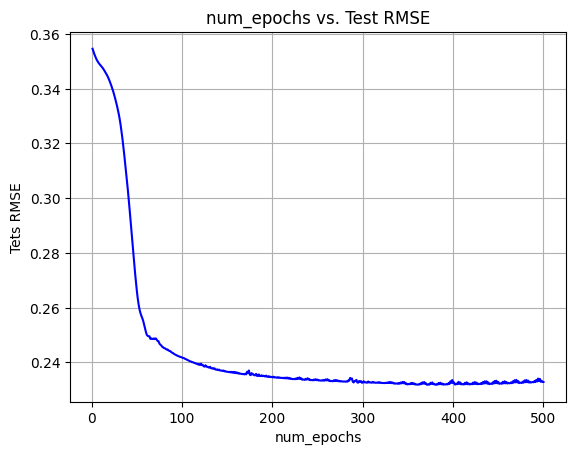

In [28]:
plt.plot(num_epochs_list, rmse_list, color='b', linestyle='-')
plt.title('num_epochs vs. Test RMSE')
plt.xlabel('num_epochs')
plt.ylabel('Tets RMSE') 
plt.grid(True)
plt.show() 

In [29]:
min_rmse = min(rmse_list)
corresponding_r2_score = r2_scores_list[rmse_list.index(min_rmse)]
corresponding_num_epochs = num_epochs_list[rmse_list.index(min_rmse)]

print(f'Min RMSE score: {min_rmse}')
print(f'Corresponding R^2 SCore: {corresponding_r2_score}')
print(f'Corresponding num_epochs: {corresponding_num_epochs}')

Min RMSE score: 0.23182724490583503
Corresponding R^2 SCore: 0.5537233963787884
Corresponding num_epochs: 381


Test R^2 Score vs. num_epochs

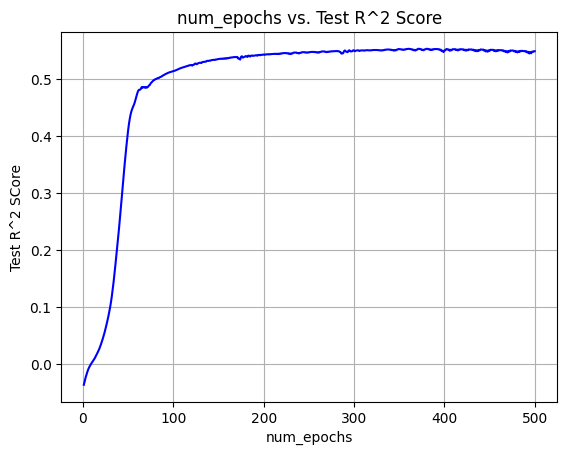

In [30]:
plt.plot(num_epochs_list, r2_scores_list, color='b', linestyle='-')
plt.title('num_epochs vs. Test R^2 Score')
plt.xlabel('num_epochs')
plt.ylabel('Test R^2 SCore') 
plt.grid(True)
plt.show() 

In [31]:
max_r2_score = max(r2_scores_list)
corresponding_rmse = rmse_list[r2_scores_list.index(max_r2_score)]
corresponding_num_epochs = num_epochs_list[r2_scores_list.index(max_r2_score)]

print(f'Max R^2 score: {max_r2_score}')
print(f'Corresponding RMSE: {corresponding_rmse}')
print(f'Corresponding num_epochs: {corresponding_num_epochs}')

Max R^2 score: 0.5537267892445145
Corresponding RMSE: 0.23185609093297552
Corresponding num_epochs: 372


Test Adjusted R^2 Score (Valence) vs. num_epochs

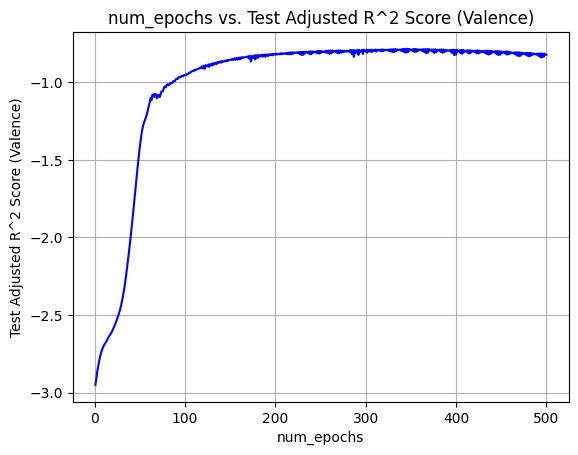

In [32]:
plt.plot(num_epochs_list, adjusted_r2_scores_valence_list, color='b', linestyle='-')
plt.title('num_epochs vs. Test Adjusted R^2 Score (Valence)')
plt.xlabel('num_epochs')
plt.ylabel('Test Adjusted R^2 Score (Valence)') 
plt.grid(True)
plt.show() 

In [33]:
max_r2_score_valence = max(adjusted_r2_scores_valence_list)
corresponding_rmse = rmse_list[adjusted_r2_scores_valence_list.index(max_r2_score_valence)]
corresponding_num_epochs = num_epochs_list[adjusted_r2_scores_valence_list.index(max_r2_score_valence)]

print(f'Max R^2 score: {max_r2_score_valence}')
print(f'Corresponding RMSE: {corresponding_rmse}')
print(f'Corresponding num_epochs: {corresponding_num_epochs}')

Max R^2 score: -0.7840612672342744
Corresponding RMSE: 0.23281701414253717
Corresponding num_epochs: 346


#### Test Adjusted R^2 Score (Arousal) vs. num_epochs

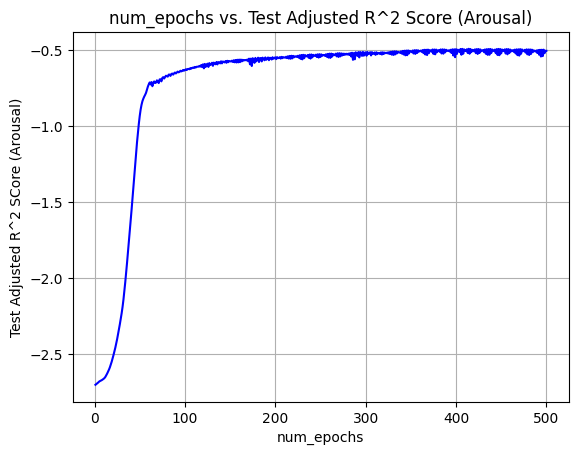

In [34]:
plt.plot(num_epochs_list, adjusted_r2_scores_arousal_list, color='b', linestyle='-')
plt.title('num_epochs vs. Test Adjusted R^2 Score (Arousal)')
plt.xlabel('num_epochs')
plt.ylabel('Test Adjusted R^2 SCore (Arousal)') 
plt.grid(True)
plt.show() 

In [35]:
max_r2_score_arousal = max(adjusted_r2_scores_arousal_list)
corresponding_rmse = rmse_list[adjusted_r2_scores_arousal_list.index(max_r2_score_arousal)]
corresponding_num_epochs = num_epochs_list[adjusted_r2_scores_arousal_list.index(max_r2_score_arousal)]

print(f'Max R^2 score: {max_r2_score_arousal}')
print(f'Corresponding RMSE: {corresponding_rmse}')
print(f'Corresponding num_epochs: {corresponding_num_epochs}')

Max R^2 score: -0.4905118605092522
Corresponding RMSE: 0.23205303902188004
Corresponding num_epochs: 414
